 # Power Load Prediction for West Zone - XG Boost Model
 
 

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [2]:
power_data_west = pd.read_csv("west_interval_data_01-29-2019_01-27-2021.csv")

In [3]:
power_data_west['End Date Time'] = pd.to_datetime(power_data_west['End Date Time'], infer_datetime_format=True)
indexedDataset = power_data_west.set_index(['End Date Time'])

In [4]:
plot_df_west = pd.DataFrame(power_data_west, columns=['Peak Demand', 'Avg. Temperature', 'End Date Time'])

In [5]:
plot_df_west['End Date Time'].min()

Timestamp('2019-01-29 00:15:00')

In [6]:
plot_df_west['End Date Time'].max()

Timestamp('2022-01-27 00:00:00')

In [7]:
power_data_west['month'] = power_data_west['End Date Time'].dt.strftime('%b')

In [8]:
power_data_west['day_of_week'] = power_data_west['End Date Time'].dt.day_name()

In [9]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

date_range = pd.date_range(start='2019-01-01', end='2022-01-27')

cal = calendar()
holidays = cal.holidays(start=date_range.min(), end=date_range.max())

power_data_west['holiday'] = power_data_west['End Date Time'].dt.date.astype('datetime64').isin(holidays)

In [10]:
power_data_west.head(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
0,west,1/29/19 0:00,2019-01-29 00:15:00,211.2,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,844.8,KW,Jan,Tuesday,False
1,west,1/29/19 0:15,2019-01-29 00:30:00,210.4,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,841.6,KW,Jan,Tuesday,False
2,west,1/29/19 0:30,2019-01-29 00:45:00,208.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,832.0,KW,Jan,Tuesday,False
3,west,1/29/19 0:45,2019-01-29 01:00:00,212.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,848.0,KW,Jan,Tuesday,False
4,west,1/29/19 1:00,2019-01-29 01:15:00,203.2,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,812.8,KW,Jan,Tuesday,False
5,west,1/29/19 1:15,2019-01-29 01:30:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
6,west,1/29/19 1:30,2019-01-29 01:45:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
7,west,1/29/19 1:45,2019-01-29 02:00:00,208.8,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,835.2,KW,Jan,Tuesday,False
8,west,1/29/19 2:00,2019-01-29 02:15:00,217.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,870.4,KW,Jan,Tuesday,False
9,west,1/29/19 2:15,2019-01-29 02:30:00,229.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,918.4,KW,Jan,Tuesday,False


In [11]:
power_data_west.tail(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
104726,west,1/26/22 21:30,2022-01-26 21:45:00,284.0,KWH,NaN,NaN,52.0,FAHRENHEIT,NaN,1136.0,KW,Jan,Wednesday,False
104727,west,1/26/22 21:45,2022-01-26 22:00:00,288.8,KWH,NaN,NaN,52.0,FAHRENHEIT,NaN,1155.2,KW,Jan,Wednesday,False
104728,west,1/26/22 22:00,2022-01-26 22:15:00,301.6,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1206.4,KW,Jan,Wednesday,False
104729,west,1/26/22 22:15,2022-01-26 22:30:00,280.0,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1120.0,KW,Jan,Wednesday,False
104730,west,1/26/22 22:30,2022-01-26 22:45:00,296.8,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1187.2,KW,Jan,Wednesday,False
104731,west,1/26/22 22:45,2022-01-26 23:00:00,282.4,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1129.6,KW,Jan,Wednesday,False
104732,west,1/26/22 23:00,2022-01-26 23:15:00,288.8,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1155.2,KW,Jan,Wednesday,False
104733,west,1/26/22 23:15,2022-01-26 23:30:00,289.6,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1158.4,KW,Jan,Wednesday,False
104734,west,1/26/22 23:30,2022-01-26 23:45:00,294.4,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1177.6,KW,Jan,Wednesday,False
104735,west,1/26/22 23:45,2022-01-27 00:00:00,290.4,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1161.6,KW,Jan,Thursday,False


In [12]:
power_data_west.describe()

,Usage,Cost,Currency Unit,Avg. Temperature,Peak Demand
count,104724.000000,0.0,0.0,104716.000000,104724.000000
mean,309.636443,NaN,NaN,67.377211,1238.545770
std,75.557612,NaN,NaN,16.591545,302.230457
min,0.000000,NaN,NaN,29.000000,0.000000
25%,252.000000,NaN,NaN,54.000000,1008.000000
50%,308.000000,NaN,NaN,66.000000,1232.000000
75%,368.000000,NaN,NaN,79.000000,1472.000000
max,531.200000,NaN,NaN,114.000000,2124.800000


In [13]:
power_data_west.shape

(104736, 15)

In [14]:
power_data_west.dtypes

Service Agreement            object
Start Date Time              object
End Date Time        datetime64[ns]
Usage                       float64
Usage Unit                   object
Cost                        float64
Currency Unit               float64
Avg. Temperature            float64
Temperature Unit             object
Event Flags                  object
Peak Demand                 float64
Demand Unit                  object
month                        object
day_of_week                  object
holiday                        bool
dtype: object

In [15]:
#For checking missing values in dataset
power_data_west.isna().sum()

Service Agreement         0
Start Date Time           0
End Date Time             0
Usage                    12
Usage Unit               12
Cost                 104736
Currency Unit        104736
Avg. Temperature         20
Temperature Unit          0
Event Flags          104730
Peak Demand              12
Demand Unit              12
month                     0
day_of_week               0
holiday                   0
dtype: int64

In [16]:
power_data_west.fillna(method='ffill',inplace=True)
power_data_west.isna().sum()

Service Agreement         0
Start Date Time           0
End Date Time             0
Usage                     0
Usage Unit                0
Cost                 104736
Currency Unit        104736
Avg. Temperature          0
Temperature Unit          0
Event Flags            3840
Peak Demand               0
Demand Unit               0
month                     0
day_of_week               0
holiday                   0
dtype: int64

In [17]:
zero_usage_df = power_data_west.loc[power_data_west['Peak Demand'] == 0]
zero_usage_df.count()

Service Agreement    50
Start Date Time      50
End Date Time        50
Usage                50
Usage Unit           50
Cost                  0
Currency Unit         0
Avg. Temperature     50
Temperature Unit     50
Event Flags          50
Peak Demand          50
Demand Unit          50
month                50
day_of_week          50
holiday              50
dtype: int64

dataset.kW.plot()

## Random Forest Model

In [18]:
xgboost_data = power_data_west[(power_data_west['End Date Time'] > '2019-01-01') & (power_data_west['End Date Time'] < '2022-02-01')]

In [19]:
xgboost_data.head(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
0,west,1/29/19 0:00,2019-01-29 00:15:00,211.2,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,844.8,KW,Jan,Tuesday,False
1,west,1/29/19 0:15,2019-01-29 00:30:00,210.4,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,841.6,KW,Jan,Tuesday,False
2,west,1/29/19 0:30,2019-01-29 00:45:00,208.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,832.0,KW,Jan,Tuesday,False
3,west,1/29/19 0:45,2019-01-29 01:00:00,212.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,848.0,KW,Jan,Tuesday,False
4,west,1/29/19 1:00,2019-01-29 01:15:00,203.2,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,812.8,KW,Jan,Tuesday,False
5,west,1/29/19 1:15,2019-01-29 01:30:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
6,west,1/29/19 1:30,2019-01-29 01:45:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
7,west,1/29/19 1:45,2019-01-29 02:00:00,208.8,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,835.2,KW,Jan,Tuesday,False
8,west,1/29/19 2:00,2019-01-29 02:15:00,217.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,870.4,KW,Jan,Tuesday,False
9,west,1/29/19 2:15,2019-01-29 02:30:00,229.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,918.4,KW,Jan,Tuesday,False


In [20]:
xgboost_data.tail(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
104726,west,1/26/22 21:30,2022-01-26 21:45:00,284.0,KWH,NaN,NaN,52.0,FAHRENHEIT,Daylight Savings,1136.0,KW,Jan,Wednesday,False
104727,west,1/26/22 21:45,2022-01-26 22:00:00,288.8,KWH,NaN,NaN,52.0,FAHRENHEIT,Daylight Savings,1155.2,KW,Jan,Wednesday,False
104728,west,1/26/22 22:00,2022-01-26 22:15:00,301.6,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1206.4,KW,Jan,Wednesday,False
104729,west,1/26/22 22:15,2022-01-26 22:30:00,280.0,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1120.0,KW,Jan,Wednesday,False
104730,west,1/26/22 22:30,2022-01-26 22:45:00,296.8,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1187.2,KW,Jan,Wednesday,False
104731,west,1/26/22 22:45,2022-01-26 23:00:00,282.4,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1129.6,KW,Jan,Wednesday,False
104732,west,1/26/22 23:00,2022-01-26 23:15:00,288.8,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1155.2,KW,Jan,Wednesday,False
104733,west,1/26/22 23:15,2022-01-26 23:30:00,289.6,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1158.4,KW,Jan,Wednesday,False
104734,west,1/26/22 23:30,2022-01-26 23:45:00,294.4,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1177.6,KW,Jan,Wednesday,False
104735,west,1/26/22 23:45,2022-01-27 00:00:00,290.4,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1161.6,KW,Jan,Thursday,False


In [21]:
xgboost_data_mod = xgboost_data[['Peak Demand', 'Avg. Temperature']].copy() 

In [22]:
xgboost_data_mod.head(10)

,Peak Demand,Avg. Temperature
0,844.8,54.0
1,841.6,54.0
2,832.0,54.0
3,848.0,54.0
4,812.8,55.0
5,822.4,55.0
6,822.4,55.0
7,835.2,55.0
8,870.4,55.0
9,918.4,55.0


In [23]:
for i in range(1, 97):
    xgboost_data_mod["demand_lag_{}".format(i)] = xgboost_data_mod['Peak Demand'].shift(i)
    xgboost_data_mod["temp_lag_{}".format(i)] = xgboost_data_mod['Avg. Temperature'].shift(i)

/var/folders/7y/xgxlym8j2wvcdq_3kmlw40zm0000gn/T/ipykernel_66590/200226715.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  xgboost_data_mod["temp_lag_{}".format(i)] = xgboost_data_mod['Avg. Temperature'].shift(i)
/var/folders/7y/xgxlym8j2wvcdq_3kmlw40zm0000gn/T/ipykernel_66590/200226715.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  xgboost_data_mod["demand_lag_{}".format(i)] = xgboost_data_mod['Peak Demand'].shift(i)
/var/folders/7y/xgxlym8j2wvcdq_3kmlw40zm0000gn/T/ipykernel_66590/200226715.py:3: PerformanceWarning: Da

/var/folders/7y/xgxlym8j2wvcdq_3kmlw40zm0000gn/T/ipykernel_66590/200226715.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  xgboost_data_mod["temp_lag_{}".format(i)] = xgboost_data_mod['Avg. Temperature'].shift(i)
/var/folders/7y/xgxlym8j2wvcdq_3kmlw40zm0000gn/T/ipykernel_66590/200226715.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  xgboost_data_mod["demand_lag_{}".format(i)] = xgboost_data_mod['Peak Demand'].shift(i)
/var/folders/7y/xgxlym8j2wvcdq_3kmlw40zm0000gn/T/ipykernel_66590/200226715.py:3: PerformanceWarning: Da

/var/folders/7y/xgxlym8j2wvcdq_3kmlw40zm0000gn/T/ipykernel_66590/200226715.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  xgboost_data_mod["temp_lag_{}".format(i)] = xgboost_data_mod['Avg. Temperature'].shift(i)
/var/folders/7y/xgxlym8j2wvcdq_3kmlw40zm0000gn/T/ipykernel_66590/200226715.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  xgboost_data_mod["demand_lag_{}".format(i)] = xgboost_data_mod['Peak Demand'].shift(i)
/var/folders/7y/xgxlym8j2wvcdq_3kmlw40zm0000gn/T/ipykernel_66590/200226715.py:3: PerformanceWarning: Da

/var/folders/7y/xgxlym8j2wvcdq_3kmlw40zm0000gn/T/ipykernel_66590/200226715.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  xgboost_data_mod["demand_lag_{}".format(i)] = xgboost_data_mod['Peak Demand'].shift(i)
/var/folders/7y/xgxlym8j2wvcdq_3kmlw40zm0000gn/T/ipykernel_66590/200226715.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  xgboost_data_mod["temp_lag_{}".format(i)] = xgboost_data_mod['Avg. Temperature'].shift(i)


In [24]:
xgboost_data_mod.head(10)

,Peak Demand,Avg. Temperature,demand_lag_1,temp_lag_1,demand_lag_2,temp_lag_2,demand_lag_3,temp_lag_3,demand_lag_4,temp_lag_4,...,demand_lag_92,temp_lag_92,demand_lag_93,temp_lag_93,demand_lag_94,temp_lag_94,demand_lag_95,temp_lag_95,demand_lag_96,temp_lag_96
0,844.8,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,841.6,54.0,844.8,54.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,832.0,54.0,841.6,54.0,844.8,54.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,848.0,54.0,832.0,54.0,841.6,54.0,844.8,54.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,812.8,55.0,848.0,54.0,832.0,54.0,841.6,54.0,844.8,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,822.4,55.0,812.8,55.0,848.0,54.0,832.0,54.0,841.6,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,822.4,55.0,822.4,55.0,812.8,55.0,848.0,54.0,832.0,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,835.2,55.0,822.4,55.0,822.4,55.0,812.8,55.0,848.0,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,870.4,55.0,835.2,55.0,822.4,55.0,822.4,55.0,812.8,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,918.4,55.0,870.4,55.0,835.2,55.0,822.4,55.0,822.4,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
xgboost_data_mod.tail(10)

,Peak Demand,Avg. Temperature,demand_lag_1,temp_lag_1,demand_lag_2,temp_lag_2,demand_lag_3,temp_lag_3,demand_lag_4,temp_lag_4,...,demand_lag_92,temp_lag_92,demand_lag_93,temp_lag_93,demand_lag_94,temp_lag_94,demand_lag_95,temp_lag_95,demand_lag_96,temp_lag_96
104726,1136.0,52.0,1212.8,52.0,1209.6,52.0,1206.4,52.0,1200.0,52.0,...,1180.8,49.0,1180.8,49.0,1200.0,49.0,1232.0,49.0,1270.4,49.0
104727,1155.2,52.0,1136.0,52.0,1212.8,52.0,1209.6,52.0,1206.4,52.0,...,1155.2,49.0,1180.8,49.0,1180.8,49.0,1200.0,49.0,1232.0,49.0
104728,1206.4,51.0,1155.2,52.0,1136.0,52.0,1212.8,52.0,1209.6,52.0,...,1158.4,50.0,1155.2,49.0,1180.8,49.0,1180.8,49.0,1200.0,49.0
104729,1120.0,51.0,1206.4,51.0,1155.2,52.0,1136.0,52.0,1212.8,52.0,...,1190.4,50.0,1158.4,50.0,1155.2,49.0,1180.8,49.0,1180.8,49.0
104730,1187.2,51.0,1120.0,51.0,1206.4,51.0,1155.2,52.0,1136.0,52.0,...,1158.4,50.0,1190.4,50.0,1158.4,50.0,1155.2,49.0,1180.8,49.0
104731,1129.6,51.0,1187.2,51.0,1120.0,51.0,1206.4,51.0,1155.2,52.0,...,1161.6,50.0,1158.4,50.0,1190.4,50.0,1158.4,50.0,1155.2,49.0
104732,1155.2,51.0,1129.6,51.0,1187.2,51.0,1120.0,51.0,1206.4,51.0,...,1148.8,50.0,1161.6,50.0,1158.4,50.0,1190.4,50.0,1158.4,50.0
104733,1158.4,51.0,1155.2,51.0,1129.6,51.0,1187.2,51.0,1120.0,51.0,...,1190.4,50.0,1148.8,50.0,1161.6,50.0,1158.4,50.0,1190.4,50.0
104734,1177.6,51.0,1158.4,51.0,1155.2,51.0,1129.6,51.0,1187.2,51.0,...,1145.6,50.0,1190.4,50.0,1148.8,50.0,1161.6,50.0,1158.4,50.0
104735,1161.6,51.0,1177.6,51.0,1158.4,51.0,1155.2,51.0,1129.6,51.0,...,1110.4,50.0,1145.6,50.0,1190.4,50.0,1148.8,50.0,1161.6,50.0


In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
def timeseries_train_test_split(X, y, test_size):
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [28]:
y = xgboost_data_mod.dropna()['Peak Demand']
X = xgboost_data_mod.dropna().drop(['Peak Demand'], axis=1)

In [29]:
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

print('Starting Model Training')

xgboost_model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#scores = cross_val_score(xgboost_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

xgboost_model.fit(X_train, y_train)

print(' Model Training Completed')

Starting Model Training


/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Ind

 Model Training Completed


In [34]:
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 27.976 (0.303)


In [38]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import mean_squared_error


def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))

def mse_error(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=True)

def rmse_error(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=False)

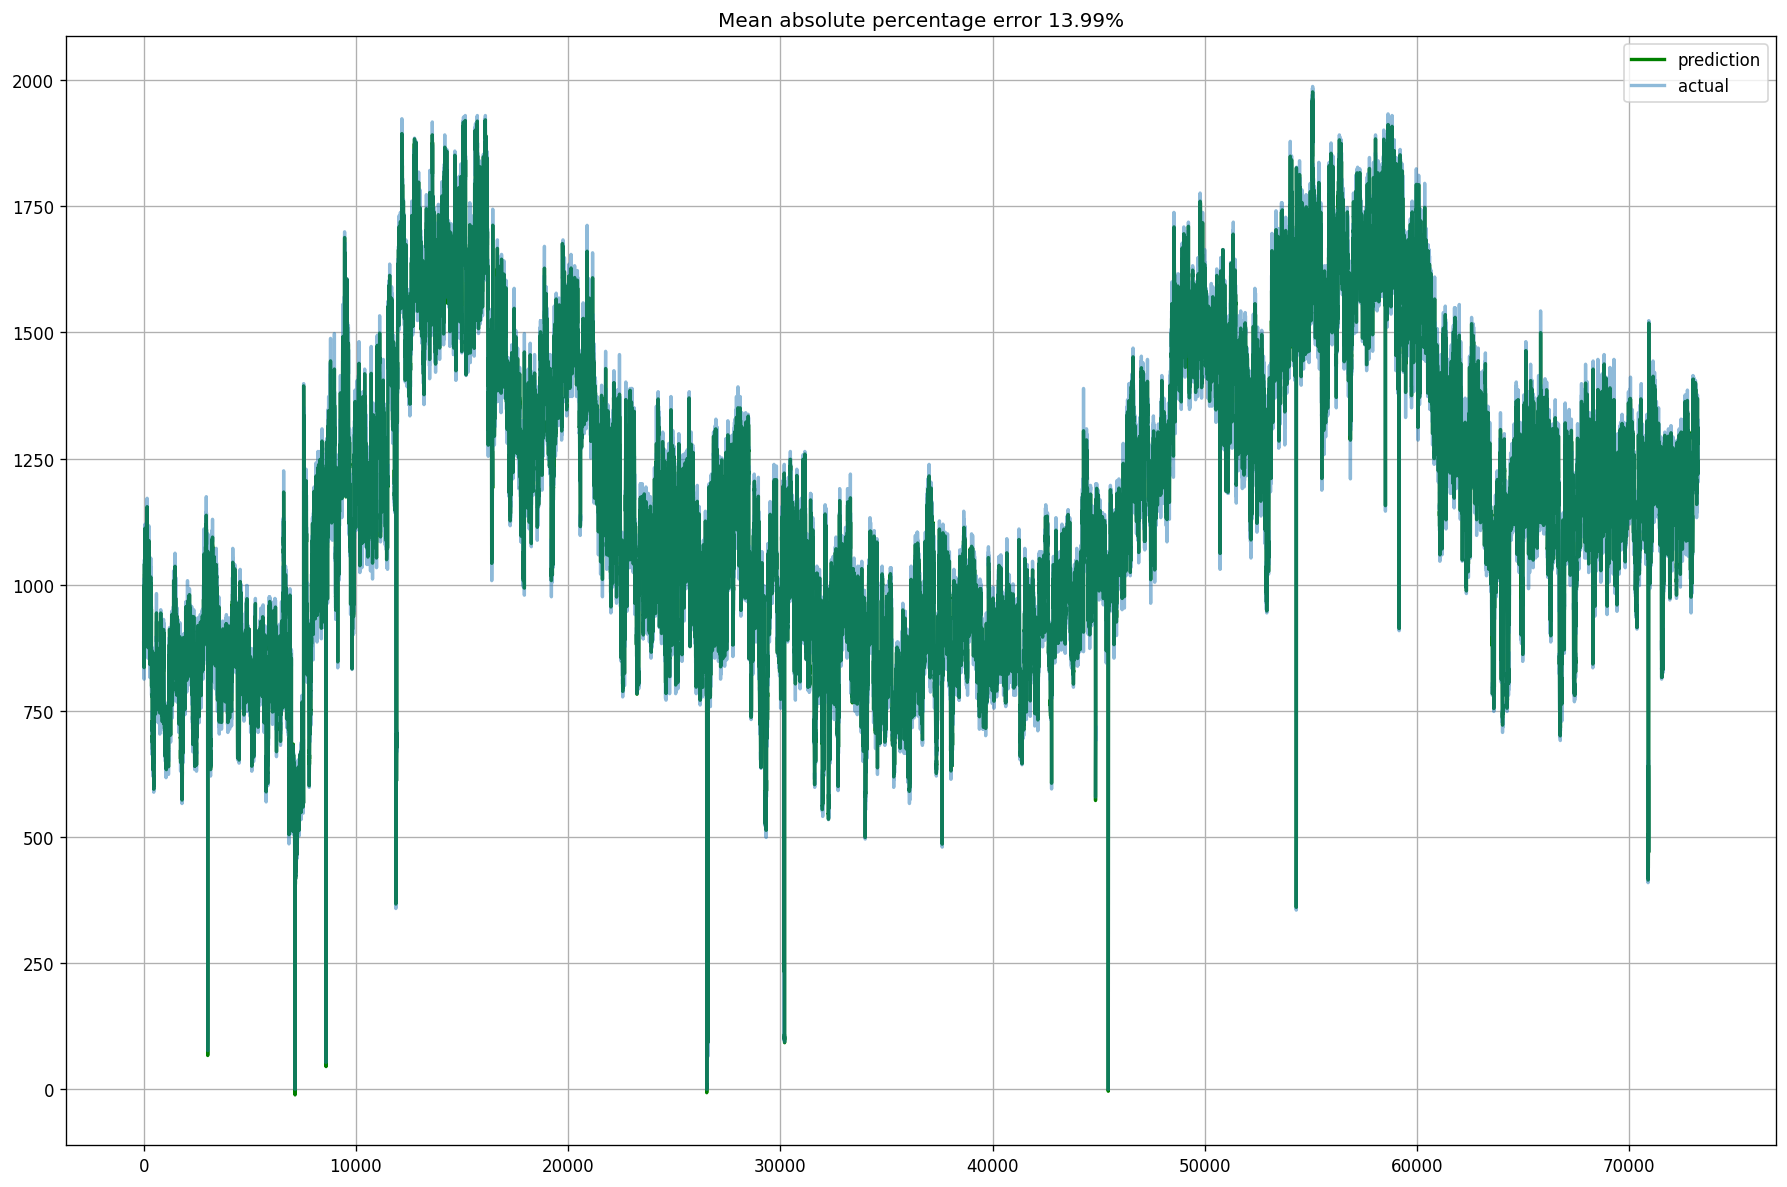

In [39]:
def plotModelTrainingResults(model, X_train=X_train, X_test=X_test):
  
    prediction = model.predict(X_train)
    
    plt.figure(figsize=(15, 10))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_train.values, label="actual", linewidth=2.0, alpha=0.5)

    mape_error_var = mean_absolute_percentage_error(prediction, y_train)
    mae_error_var = mean_absolute_error(prediction, y_train)
    mse_error_var = mse_error(prediction, y_train)
    rmse_error_var = rmse_error(prediction, y_train)
    
    plt.title("Mean absolute percentage error {0:.2f}%".format(mae_error_var))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
    results = pd.DataFrame({'Actual':y_train, 
                            'Prediction':prediction  
                           })
    
    return results, mape_error_var, mae_error_var, mse_error_var, rmse_error_var
    
train_results, train_mape_error_var, train_mae_error_var, train_mse_error_var, train_rmse_error_var = plotModelTrainingResults(xgboost_model)

In [40]:
train_results.tail(10)

,Actual,Prediction
73334,1296.0,1272.052490
73335,1222.4,1257.215942
73336,1228.8,1226.285278
73337,1203.2,1223.668457
73338,1222.4,1219.495239
73339,1251.2,1228.573364
73340,1254.4,1236.167725
73341,1257.6,1244.149658
73342,1222.4,1240.428223
73343,1232.0,1225.022705


In [41]:
print('MAPE: ' , train_mape_error_var)
print('MAE: ', train_mae_error_var)
print('MSE: ', train_mse_error_var)
print('RMSE: ', train_rmse_error_var)

MAPE:  1.288970363131108
MAE:  13.994398758612043
MSE:  332.6063952266178
RMSE:  18.23749969778253


/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


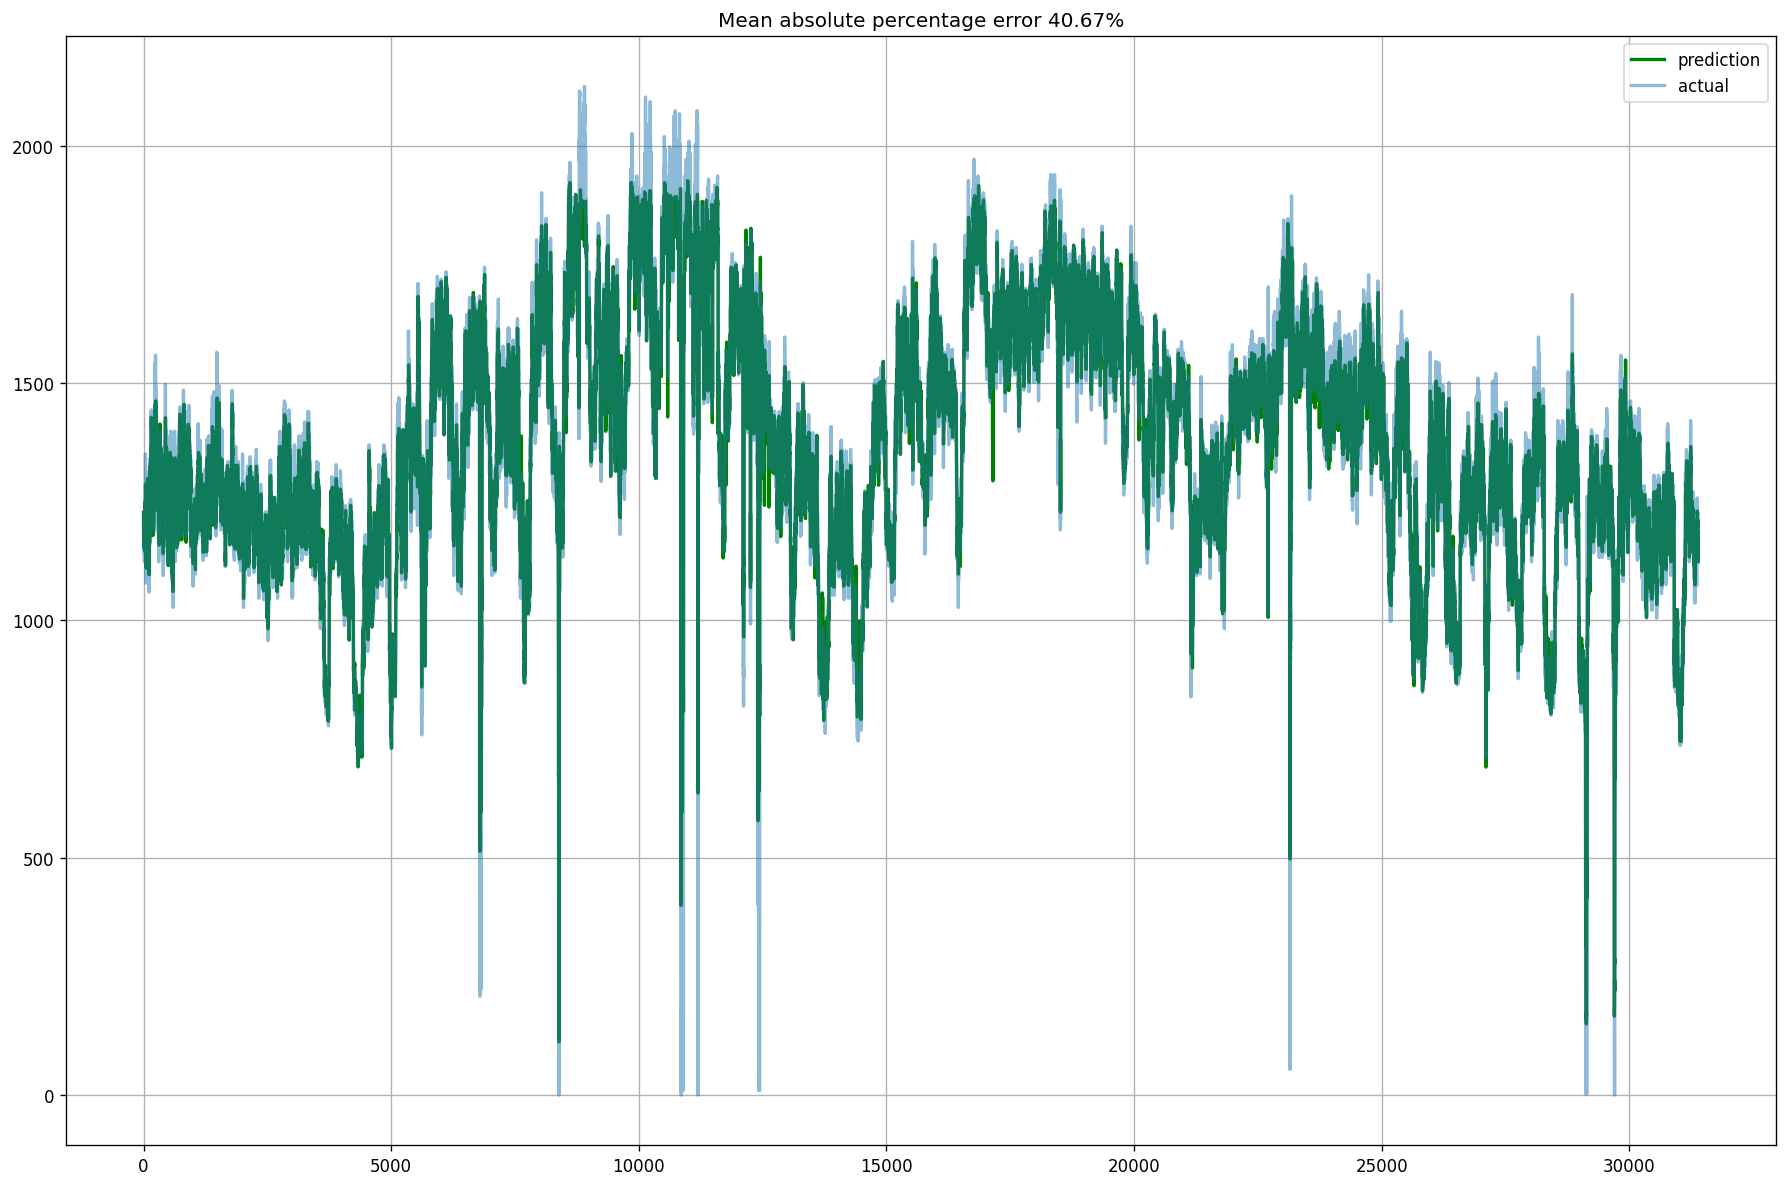

In [42]:
def plotModelPredictions(model, X_train=X_train, X_test=X_test):
  
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 10))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0, alpha=0.5)

    mape_error_var = mean_absolute_percentage_error(prediction, y_test)
    mae_error_var = mean_absolute_error(prediction, y_test)
    mse_error_var = mse_error(prediction, y_test)
    rmse_error_var = rmse_error(prediction, y_test)
    
    plt.title("Mean absolute percentage error {0:.2f}%".format(mae_error_var))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
    results = pd.DataFrame({'Actual':y_test, 
                            'Prediction':prediction  
                           })
    
    return results, mape_error_var, mae_error_var, mse_error_var, rmse_error_var
    
results, mape_error_var, mae_error_var, mse_error_var, rmse_error_var = plotModelPredictions(xgboost_model)

In [43]:
results.tail(10)

,Actual,Prediction
104726,1136.0,1210.874878
104727,1155.2,1155.154419
104728,1206.4,1159.507324
104729,1120.0,1188.231445
104730,1187.2,1123.506714
104731,1129.6,1175.058838
104732,1155.2,1139.441162
104733,1158.4,1163.650024
104734,1177.6,1147.030762
104735,1161.6,1165.821533


In [44]:
print('MAPE: ' , mape_error_var)
print('MAE: ', mae_error_var)
print('MSE: ', mse_error_var)
print('RMSE: ', rmse_error_var)

MAPE:  3.284359002586147
MAE:  40.6745285634382
MSE:  4829.94338563934
RMSE:  69.49779410628325


In [46]:
import joblib
joblib.dump(xgboost_model, "./xgboost_model.joblib")

['./xgboost_model.joblib']